In [9]:
import rawpy
import matplotlib.pyplot as plt

In [60]:
rgb_path = "./data/20250310_183111_rgb.dng"
ir_path = "./data/20250310_183111_ir.dng"
raw_rgb = rawpy.imread(path)
raw_ir = rawpy.imread(ir_path)

def display_basic_statistics(raw_im):
    # Calculate the standard deviation of each 2x2 subsquare
    std_devs = np.std([raw_im[0::2, 0::2], raw_im[0::2, 1::2], raw_im[1::2, 0::2], raw_im[1::2, 1::2]], axis=0)
    means = np.mean([raw_im[0::2, 0::2], raw_im[0::2, 1::2], raw_im[1::2, 0::2], raw_im[1::2, 1::2]], axis=0)
    # Take the mean of the standard deviations
    mean_std_dev = np.mean(std_devs)

    print("Mean of All Values: ", np.mean(means))
    print("Mean Per Channel", np.mean(means, axis=(0,1)))
    print("Mean Std Dev Per Sub-Pixel: ", mean_std_dev)
    print(f"Percentage of Std Dev to Full Range {2**16}: ", mean_std_dev/2**16)

In [61]:
display_basic_statistics(raw_rgb.raw_image_visible)

Mean of All Values:  12597.084653745587
Mean Per Channel 12597.084653745587
Mean Std Dev Per Sub-Pixel:  3574.7248929773787
Percentage of Std Dev to Full Range 65536:  0.05454597309840971


In [62]:
display_basic_statistics(raw_ir.raw_image_visible)

Mean of All Values:  9666.611376258694
Mean Per Channel 9666.611376258694
Mean Std Dev Per Sub-Pixel:  353.21218452261337
Percentage of Std Dev to Full Range 65536:  0.005389590217935385


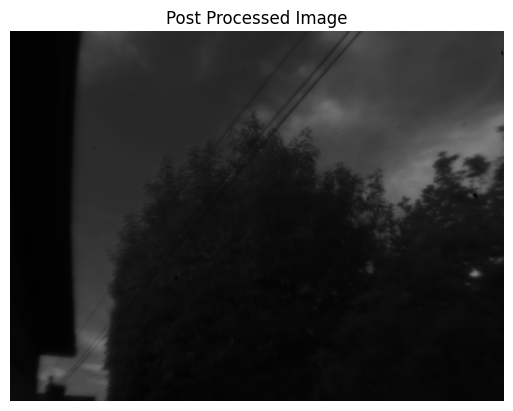

In [68]:
plt.imshow(raw_ir.raw_image_visible/2**16, cmap='gray')
plt.title('Post Processed Image')
plt.axis('off')  # Hide the axis
plt.show()

In [51]:
np.array([raw_im[0::2, 0::2], raw_im[0::2, 1::2], raw_im[1::2, 0::2], raw_im[1::2, 1::2]]).transpose(1,2,0)

array([[[ 5008,  7712,  8224,  7088],
        [ 4912,  8032,  8064,  7360],
        [ 5232,  7872,  8128,  7360],
        ...,
        [ 7584, 21248, 20608, 20928],
        [ 7680, 21056, 21120, 20800],
        [ 7488, 21248, 20416, 20160]],

       [[ 5088,  7936,  7584,  7088],
        [ 4944,  8224,  7808,  7456],
        [ 4960,  8384,  8064,  7584],
        ...,
        [ 7584, 21312, 20608, 21184],
        [ 7488, 20608, 20672, 20608],
        [ 7712, 20736, 21440, 21312]],

       [[ 5008,  7904,  8064,  7264],
        [ 5072,  8224,  7904,  7552],
        [ 4944,  7776,  8160,  7584],
        ...,
        [ 7424, 21312, 21248, 21056],
        [ 7424, 20736, 20672, 21120],
        [ 7296, 20352, 20608, 20416]],

       ...,

       [[ 4288,  5008,  5040,  4784],
        [ 4288,  5136,  5056,  4992],
        [ 4368,  5264,  5216,  4912],
        ...,
        [ 4224,  4624,  4464,  4496],
        [ 4224,  4624,  4480,  4448],
        [ 4224,  4656,  4576,  4432]],

       [[ 4320,

In [77]:
post_process = raw_ir.postprocess(gamma=(1,1),  use_camera_wb=False, user_wb=[1, 1, 1, 1], output_color=rawpy.ColorSpace.raw, no_auto_bright=True, output_bps=16)
post_process

array([[[  566,   781,   521],
        [  588,   792,   521],
        [  611,   815,   521],
        ...,
        [13489, 13274, 13863],
        [13433, 13870, 13727],
        [13433, 14271, 13591]],

       [[  656,   770,   521],
        [  588,   792,   521],
        [  520,   883,   521],
        ...,
        [13444, 14440, 13863],
        [13399, 14067, 13727],
        [13399, 14225, 13591]],

       [[  747,   709,   566],
        [  588,   724,   566],
        [  430,   769,   588],
        ...,
        [13399, 15471, 13965],
        [13365, 14814, 13710],
        [13365, 14339, 13455]],

       ...,

       [[ 2638,  3397,  2265],
        [ 2938,  3074,  2265],
        [ 3238,  2741,  2321],
        ...,
        [ 1738,  2055,  1427],
        [ 1687,  1925,  1506],
        [ 1687,  2008,  1585]],

       [[ 2559,  3269,  2446],
        [ 3012,  3352,  2446],
        [ 3465,  3057,  2463],
        ...,
        [ 1755,  1970,  1540],
        [ 1721,  1891,  1562],
        [ 1721,

In [63]:
display_basic_statistics(post_process)

Mean of All Values:  7772.764225838264
Mean Per Channel [7672.99967    8218.54702431 7426.74598321]
Mean Std Dev Per Sub-Pixel:  330.96754730967643
Percentage of Std Dev to Full Range 65536:  0.005050163990931342


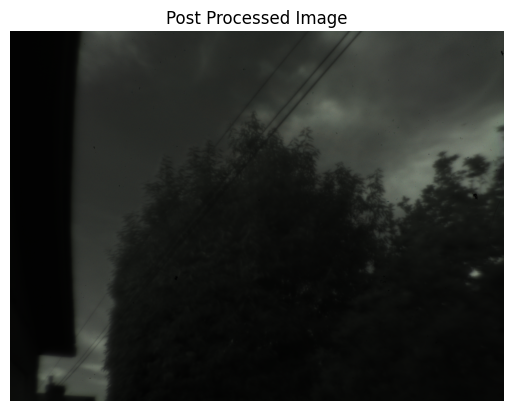

In [69]:
plt.imshow(post_process/2**16)
plt.title('Post Processed Image')
plt.axis('off')  # Hide the axis
plt.show()